In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
import os

from johnstondechazal import FindGrouthTruth
from johnstondechazal.visualise import plot_history
from johnstondechazal.data import load_image, IMAGE_FILES

def converge_all_landmarks(gt, arr, meta):
    """Helper function to find a set of ground truth landmarks"""
    annotators, samples, landmarks, dims = arr.shape
    all_history = []

    for idx in tqdm(range(landmarks)):
        all_history.append(gt.converge_select(arr[:,:,idx,:], meta))
    return all_history

In [2]:
# Find ground truth landmarks for all images
gt = FindGrouthTruth()
img_history = {}

for img_name in IMAGE_FILES:

    arr, meta = gt.load_landmarks_image(img_name)
    all_history = converge_all_landmarks(gt, arr, meta)
    img_history[img_name] = all_history

100%|██████████| 22/22 [00:02<00:00,  7.76it/s]


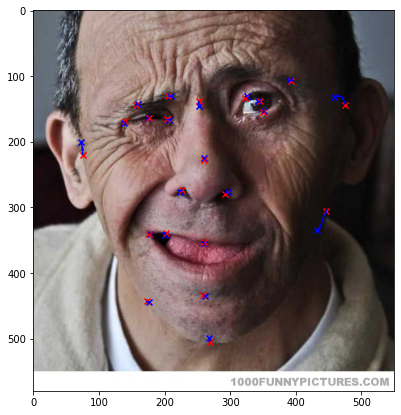

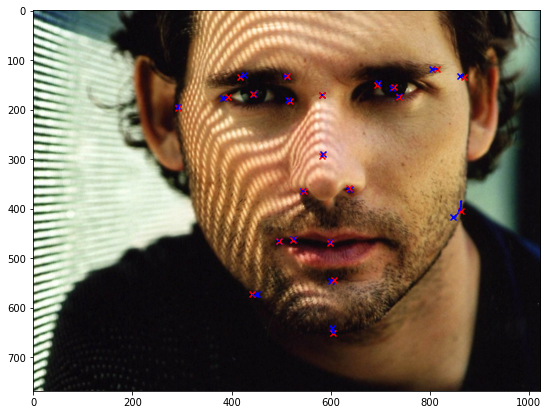

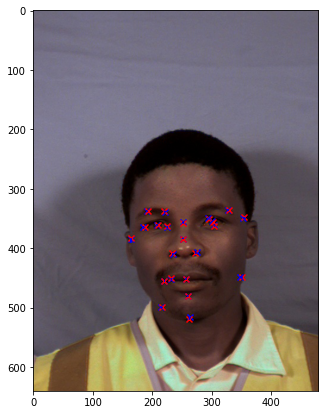

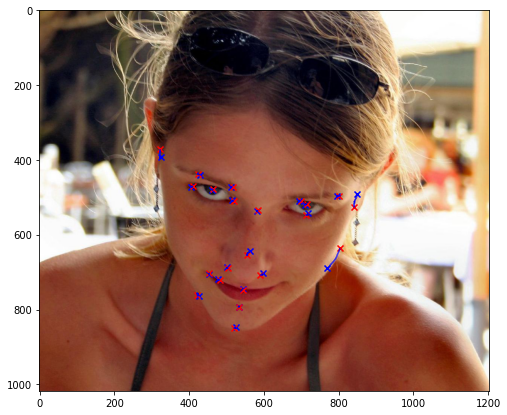

In [9]:
# Display landmarks
for idx, (img_name, hist) in enumerate(img_history.items()):

    fig, ax = plt.subplots(figsize=(10, 7)) 
    img = load_image(img_name)
    ax.imshow(img)

    for _hist in hist:
        plot_history(_hist, ax, marker='x', s=2)

In [ ]:
gt = FindGrouthTruth()
arr, meta = gt.load_landmarks_image('i001qa-mn.jpg')
img = load_image('i001qa-mn.jpg')

In [ ]:
annotators, samples, landmarks, dims = arr.shape
all_history = []
for idx in tqdm(range(landmarks)):
    all_history.append(gt.converge_select(arr[:,:,idx,:], meta))

fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10, 7))

plot_history(obj.converge_select(arr[:, :, idx, :], meta, -0.5), ax, ['b', 'r'])
plot_history(obj.converge_select(arr[:, :, idx, :], meta, -1), ax1, ['g', 'y'])